# lec05_무위험_위험_자산_모델링

In [1]:
import pandas as pd
import numpy as np
from datetime import date
import logging
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings(action='ignore')

# numeric_level = getattr(logging, 'INFO', None)
# logging.basicConfig(level=numeric_level, format='%(asctime)s %(levelname)-8s %(message)s', datefmt='%Y-%m-%d %H:%M:%S')

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
sns.set()

# by 김민형
plt.rc('font', family='Malgun Gothic')

# 무위험자산모델링

* <img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcHHNrd%2Fbtq5G08sNjl%2F0C3WRnMhq8w6jzpsu2CAK1%2Fimg.png">

In [5]:
import math
# 1000원 10년동안 10%이자로 연속복리 계산
r = 0.1
n = 10
M = 1000
# 1000* math.e**(0.1*10)
M * math.e**(r*n)

2718.2818284590453

In [6]:
def my_riskfree_value(M,r,n):
    return M * math.e**(r*n)

In [8]:
my_riskfree_value(1000,0.1,5)

1648.7212707001281

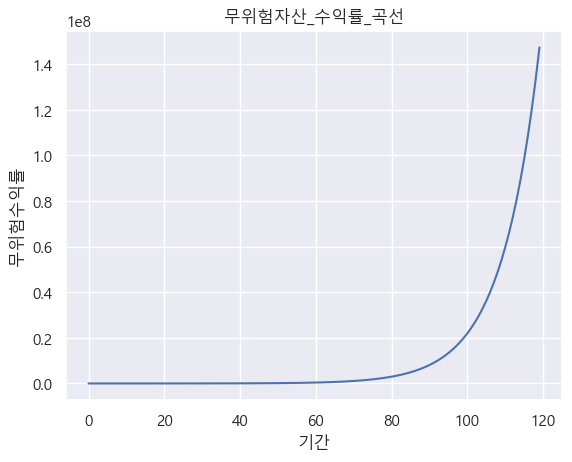

In [14]:
n = np.array([m for m in np.arange(0,120,1)])
r = 0.1
M = 1000
res_arr = my_riskfree_value(1000,0.1,n)
plt.plot(n, res_arr)
plt.title("무위험자산_수익률_곡선")
plt.xlabel("기간")
plt.ylabel("무위험수익률")
plt.show()

# Random Walk
* ref : https://insightcampus.co.kr/2019/01/07/%EA%B8%88%EC%9C%B5%EC%88%98%ED%95%99-7-%EB%9E%9C%EB%8D%A4-%EC%9B%8C%ED%81%AC%EC%99%80-%EB%B8%8C%EB%9D%BC%EC%9A%B4-%EC%9A%B4%EB%8F%99-random-walk-and-brownian-motion/

# 브라운 운동(Brown Motion), 위너 프로세스(Wiener Process)

In [17]:
T  = 1
N  = 1000
dt = T / N
np.sqrt(dt)

0.03162277660168379

In [18]:
# Generate Series of 1) Time, 2) White Noise & 3) Brownian Motion
t = np.array([i for i in np.arange(0, T, T/N)])
dX = np.random.randn(N) * np.sqrt(dt)
X = np.cumsum(dX)

# 위험자산 모델링
* 이토의 보조정리 : 확률 미적분 분야에서의 연쇄법칙(기초자산, 파생상품간의 관계)확률 미적분으로 설명

<img src = "https://mblogthumb-phinf.pstatic.net/MjAxOTAyMTZfMTEy/MDAxNTUwMzEyNjc2NzI2.9Xyd8iDhLA3cRD0HtWEOMz45GBbmTtxmim8N7u8pOEgg.XPlNxEBEqRnMn11fGrVulZx2dlQxuKouZ5Ob_0DRtTAg.PNG.stochastic73/image.png?type=w800">

(array([  1.,   3.,  19.,  71., 171., 254., 258., 144.,  61.,  18.]),
 array([1013.70986074, 1029.1521357 , 1044.59441065, 1060.03668561,
        1075.47896057, 1090.92123552, 1106.36351048, 1121.80578543,
        1137.24806039, 1152.69033535, 1168.1326103 ]),
 <BarContainer object of 10 artists>)

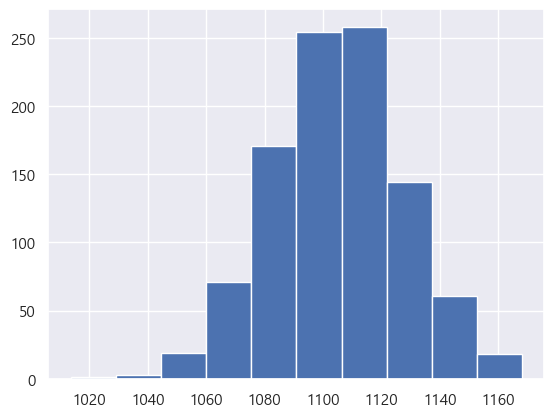

In [22]:
S0    = 1000
mu    = 0.1          # drift(장기적추세),시장의 무위험 이자율 : 단기채권금리, CD금리
sigma = 0.02         # difussion(단기적추세)
t     = 1 

St = S0 * np.exp((mu - 0.5 * sigma ** 2) * t + sigma * np.sqrt(t) * np.random.randn(N))
# print(St)
plt.hist(St)

In [ ]:
* 효율적투자 곡선

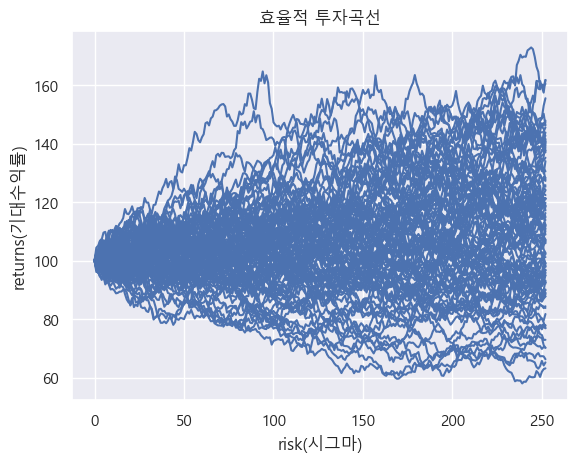

In [32]:
S0 = 100                  # 초기가격(Initial Price)
mu = 0.1                  # 추세(Drift)
sigma = 0.23              # 변동성(Volatility)
T = 1.0                   # 만기(Time to Maturity)
N = 100                   # 시뮬레이션 횟수
D = 252                   # 1년영업일수
dt = T / D                # 일의 연율화
S = np.zeros((D + 1, N))  # (253, 10000)
S[0] = S0                 # 초기가격
for t in range(1, D + 1): # 위험자산 수익률
    
    S[t] = S[t-1] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * np.random.randn(N))
    
    
plt.plot(S, c='b')
plt.title("효율적 투자곡선")
plt.xlabel("risk(시그마)")
plt.ylabel("returns(기대수익률)")

plt.show()

# 무위험 포트폴리오
* 델타헤지 : 불확실성을 제거하기 위해서 기초자산을 델타만큼 사거나 팔아 포트폴리오의 위험을 제거

# 블랙숄즈 편미분 방정식

# 블랙숄즈 옵션가

<img src="https://blogfiles.pstatic.net/MjAxOTA0MDhfNDUg/MDAxNTU0NzI5NTI3NzM1.kSeCeQRjbkiJUIAFwFXHdrZK-y8pDbG0EEIkDtTG1ckg.c5FSnX0ocgTJlXr0BIITEJ89oz3VRbw6lxJJUn3gbSgg.PNG.stochastic73/image.png">

In [33]:
import math

In [ ]:
S = 1000
K = 1300
t = 1
T = 50
N = 100
r = 0.25
sigma = 0.2

* 콜옵션

In [36]:
def my_잔존만기(현재일, 만기일, workday=252) : 
    # t = pd.to_datetime(시작일).date()
    # T = pd.to_datetime(종료일).date()
    # dcnt = (np.busday_count(T, t))  
    dcnt = (np.busday_count(현재일, 만기일))  
    return dcnt
my_잔존만기('2023-05-15', '2023-07-22')

50

In [37]:
현재일, 만기일 = '2023-05-15', '2023-07-22'
잔존만기일 = my_잔존만기('2023-05-15', '2023-07-22')  

기초자산가 = 1000
행사가     = 1300
이자율     = 0.25
변동율     = 0.2

from scipy import  stats
def 옵션이론가(기초자산가, 행사가, 잔존만기일, 이자율=0.25, 변동율=0.2, 구분='call'):
    d1 = (  np.log(기초자산가 / 행사가)  + (이자율 + 변동율**2 * 0.5) * 잔존만기일) / (변동율 * np.sqrt(잔존만기일))
    d2 = d1 -  (변동율 * np.sqrt(잔존만기일))
    print(d1, d2)
    if  구분=='call':
        옵션이론가 = 기초자산가 * stats.norm.cdf(d1, 0.0, 1.0)   -  행사가 * np.exp(-이자율*잔존만기일) * stats.norm.cdf(d2, 0.0, 1.0)
    else : 
        옵션이론가 = -1*기초자산가 * stats.norm.cdf(-1*d1, 0.0, 1.0) +  행사가 * np.exp(-이자율*잔존만기일) * stats.norm.cdf(-1*d2, 0.0, 1.0)
    return 옵션이론가

In [38]:
옵션이론가(기초자산가, 행사가, 잔존만기일,구분='call' )

9.360421995472407 7.946208433099312


999.9951553508763

In [39]:
옵션이론가(기초자산가, 행사가, 잔존만기일, 구분='put')

9.360421995472407 7.946208433099312


6.873510290148217e-19